In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = rf"miku.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert BGR to RGB (since OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.imshow(image, cmap='gray')

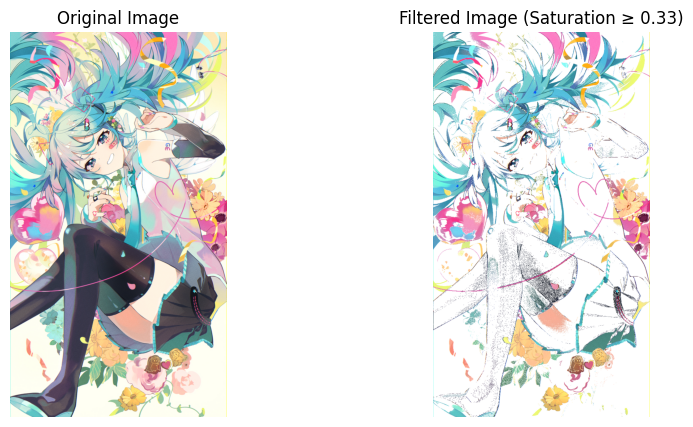

In [12]:
# Saturation filtering

def filter_low_saturation(threshold=0.5):
    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Normalize saturation values to range [0,1] and create mask
    saturation = hsv_image[:, :, 1] / 255.0  # Normalize saturation values
    mask = saturation >= threshold  # Keep pixels above threshold

    # Apply mask: Set low-saturation pixels to white (255,255,255)
    output_image = image.copy()
    output_image[~mask] = [255, 255, 255]  # Replace low-saturation pixels with white

    # Display original and filtered images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(output_image)
    ax[1].set_title(f"Filtered Image (Saturation ≥ {threshold})")
    ax[1].axis("off")

    plt.show()
    
    return output_image

# Example usage
filtered_image = filter_low_saturation(0.33)

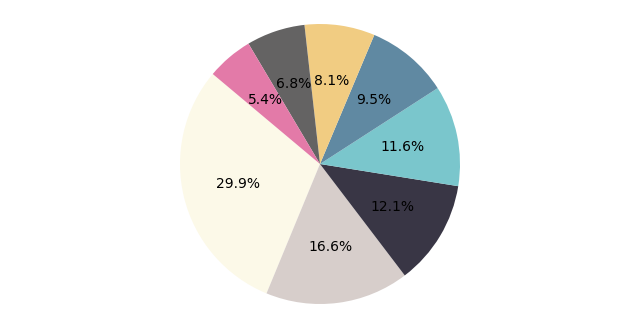

In [14]:
# Color clustering

from sklearn.cluster import KMeans

def color_clustering(k=5):
    # Reshape image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)

    # Get cluster centers (dominant colors)
    dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

    # Get histogram of cluster distribution
    labels, counts = np.unique(kmeans.labels_, return_counts=True)

    # Sort colors by frequency
    sorted_indices = np.argsort(-counts)
    dominant_colors = dominant_colors[sorted_indices]
    counts = counts[sorted_indices]

    # Plot the dominant colors
    plt.figure(figsize=(8, 4))
    plt.pie(counts, 
            colors=[dominant_colors[i] / 255 for i in range(len(dominant_colors))], 
            autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()

    return dominant_colors

# Example usage
dominant_colors = color_clustering(8)
# print("Dominant Colors (RGB):", dominant_colors)


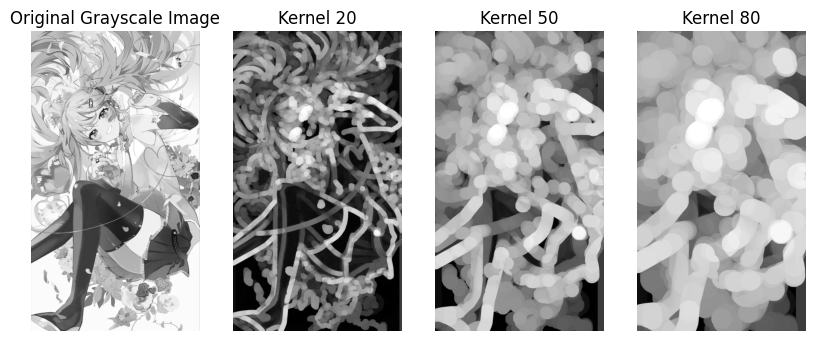

In [40]:
# Value range

def value_range(kernel_size):
    circular_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

    # Apply max and min filtering using OpenCV
    max_filtered = cv2.dilate(gray_image, circular_kernel)
    min_filtered = cv2.erode(gray_image, circular_kernel)

    plt.title(f"Kernel {kernel_size}")
    plt.imshow(max_filtered - min_filtered, cmap="gray")
    plt.axis("off")


# Display results
plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 2)
value_range(20)
plt.subplot(1, 4, 3)
value_range(50)
plt.subplot(1, 4, 4)
value_range(80)

plt.show()

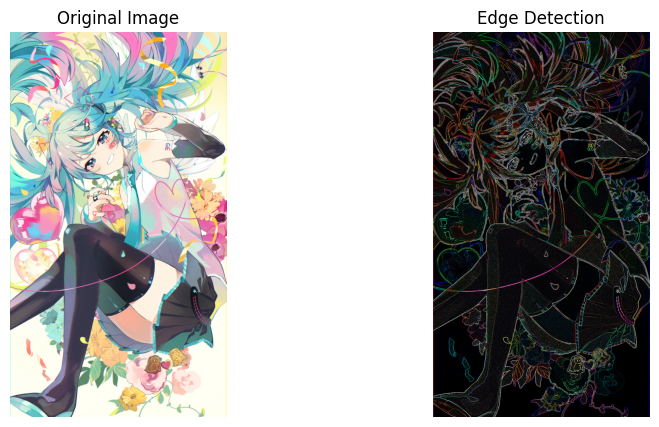

True

In [ ]:
# Edge detection

# Define the edge detection kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]], dtype=np.float32)

# Apply the kernel using cv2.filter2D
edges = cv2.filter2D(image, -1, kernel)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()
cv2.imwrite("edges.png", cv2.cvtColor(edges, cv2.COLOR_RGB2BGR))

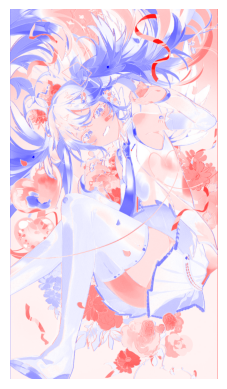

True

In [ ]:
#Temperature analysis

# Extract Red and Blue channels
red_channel = image[:, :, 0].astype(np.int16)
blue_channel = image[:, :, 2].astype(np.int16)

# Compute difference (R - B)
diff = red_channel - blue_channel

# Normalize values to fit in range [-255, 255]
diff_normalized = np.clip(diff, -255, 255)

# Create colored image
colorized_image = np.zeros_like(image)
colorized_image[:, :, 0] = np.clip(diff_normalized + 255, 0, 255).astype(np.uint8)  # Blue
colorized_image[:, :, 1] = np.clip(255 - abs(diff_normalized), 0, 255).astype(np.uint8)  # White transition
colorized_image[:, :, 2] = np.clip(-diff_normalized + 255, 0, 255).astype(np.uint8)  # Red

# Display image in notebook
plt.imshow(colorized_image)
plt.axis("off")  # Hide axis
plt.show()

cv2.imwrite("temperature_analysis.png", cv2.cvtColor(colorized_image, cv2.COLOR_RGB2BGR))